# Importing the neccessary libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import math

import datetime

# Importing Dataset and Visualizing it

In [2]:
uber_df=pd.read_csv("datasets_1026_1855_My Uber Drives - 2016.csv")

In [3]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


# Dataset Cleaning

In [5]:
# Remove uncessary data
uber_df = uber_df[:-1]

In [6]:
# fix data types of data columns
def convert_time(column_name):
    y=[]
    for x in uber_df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    uber_df[column_name] = y

In [7]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [8]:
# check that all data is fixed and ready to work on it
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


# Visualization

In [9]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month

In [10]:
#extract week from start date
count = 0
week=[]
while count < len(uber_df):
    day=uber_df['START_DATE*'][count].day
    wk=math.ceil(day/7)
    if(wk!=5):
        week.append(wk)
    else:
        week.append(4)
    count = count+1
uber_df['Week'] = week

In [11]:
# calculate speed of each trip in miles/min
minutes=[]
uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['Duration_Minutes']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber_df['Duration_Minutes'] = minutes

In [21]:
# calculate speed of each trip in miles/hour
count = 0
speed=[]
while count < len(uber_df):
    x=uber_df['MILES*'][count]
    x=x*1.60934
    y=uber_df['Duration_Minutes'][count]/60
    if(y!=0):
        speed.append(x / y)
    else:
        speed.append(0)
    count=count+1
uber_df['Speed'] = speed

In [29]:
print(uber_df)

             START_DATE*           END_DATE* CATEGORY*            START*  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1150 2016-12-31 01:07:00 2016-12-31 01:14:00  Business           Kar?chi   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   

                 STOP*  MILES*         PURPOSE*  Month  Week  \
0          Fort Pierce 

Text(0.5, 1.0, 'Number of trips per hours of the day')

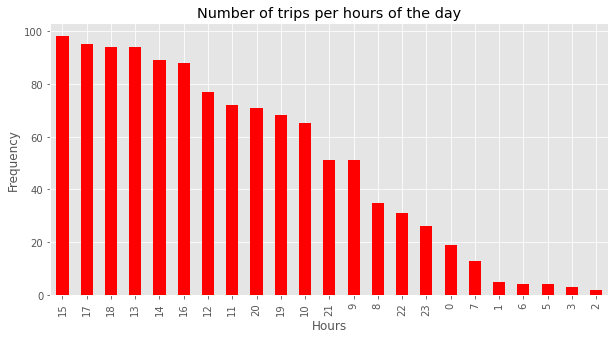

In [34]:
# plot number of trips per hour of the day
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hours of the day')

Text(0.5, 1.0, 'Number of trips per Week')

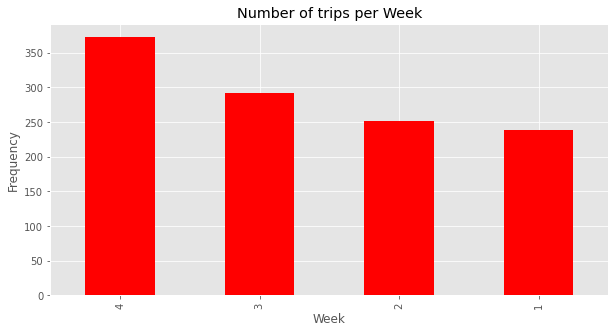

In [33]:
# plot number of trips at each week
x = uber_df['Week'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='red')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Number of trips per Week')

Text(0.5, 1.0, 'Number of trips per Month of the Year')

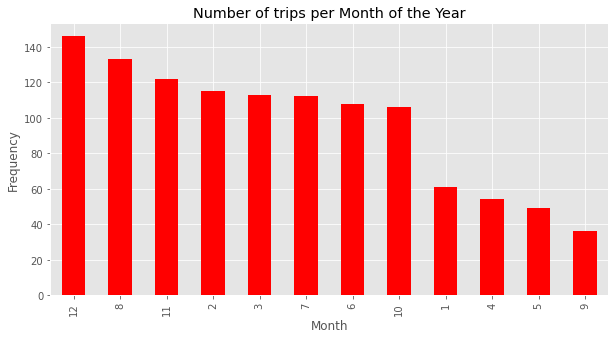

In [32]:
# plot number of trips at each month of the year and we can see that maximum number of trips are done in the month of december
x = uber_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='red')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month of the Year')